In [1]:
%run data_loader.ipynb
%run utils.ipynb

In [2]:
# Number of data
print(len(os.listdir('./data/annotations_train/')))
print(len(os.listdir('./data/images_train/')))
print(len(os.listdir('./data/annotations_val/')))
print(len(os.listdir('./data/images_val/')))
print(len(os.listdir('./data/annotations_test/')))
print(len(os.listdir('./data/images_test/')))

5787
5787
722
722
727
727


In [3]:
dataset = RadarDataset(data_transform, "./data/images_train/")
val_dataset = RadarDataset(data_transform, "./data/images_val/")
test_dataset = RadarDataset(data_transform, './data/images_test/')

data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=False)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)

In [4]:
model = get_model_instance_segmentation(2)
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
# Parameters
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

train_epoch_loss_list = []
val_epoch_loss_list = []

print('----------------------train start--------------------------')

for i in range(num_epochs):
    start = time.time()
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating training dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex1_'+str(i+1)+'.pt')
    print(f'epoch : {i+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating training dataset: 100%|███████████| 2894/2894 [13:08<00:00,  3.67it/s]


epoch : 1, Train Loss : 0.27164918650907116, Val Loss : 3.8221411589440217


Iterating training dataset: 100%|███████████| 2894/2894 [13:06<00:00,  3.68it/s]


epoch : 2, Train Loss : 0.216572627436779, Val Loss : 0.25769842543492194


Iterating training dataset: 100%|███████████| 2894/2894 [13:06<00:00,  3.68it/s]


epoch : 3, Train Loss : 0.19030094165586672, Val Loss : 0.2230680020954305


In [6]:
# Parameters
num_epochs = 10
lr=0.000001
optimizer = torch.optim.Adam(model.parameters(), lr)

print('----------------------train start--------------------------')

for i in range(num_epochs):
    start = time.time()
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
    
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating training dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex1_1_'+str(i+1)+'.pt')
    print(f'epoch : {i+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating training dataset: 100%|███████████| 2894/2894 [13:05<00:00,  3.68it/s]


epoch : 1, Train Loss : 0.1570621297605279, Val Loss : 0.20356635596613473


Iterating training dataset: 100%|███████████| 2894/2894 [13:05<00:00,  3.68it/s]


epoch : 2, Train Loss : 0.14890742065473803, Val Loss : 0.1889547933424485


Iterating training dataset: 100%|███████████| 2894/2894 [13:05<00:00,  3.68it/s]


epoch : 3, Train Loss : 0.14487705043881988, Val Loss : 0.18693483630943414


Iterating training dataset: 100%|███████████| 2894/2894 [13:07<00:00,  3.67it/s]


epoch : 4, Train Loss : 0.1416719438029941, Val Loss : 0.1850819314037994


Iterating training dataset: 100%|███████████| 2894/2894 [13:09<00:00,  3.67it/s]


epoch : 5, Train Loss : 0.13931854012143574, Val Loss : 0.18571252724635634


Iterating training dataset: 100%|███████████| 2894/2894 [13:05<00:00,  3.68it/s]


epoch : 6, Train Loss : 0.13762742294443986, Val Loss : 0.18439660808510067


Iterating training dataset: 100%|███████████| 2894/2894 [13:06<00:00,  3.68it/s]


epoch : 7, Train Loss : 0.1353874421590307, Val Loss : 0.18553678587677572


Iterating training dataset: 100%|███████████| 2894/2894 [13:10<00:00,  3.66it/s]


epoch : 8, Train Loss : 0.13366124874692728, Val Loss : 0.1853730621337478


Iterating training dataset: 100%|███████████| 2894/2894 [13:08<00:00,  3.67it/s]


epoch : 9, Train Loss : 0.132329713317946, Val Loss : 0.18722190682639542


Iterating training dataset: 100%|███████████| 2894/2894 [13:10<00:00,  3.66it/s]


epoch : 10, Train Loss : 0.13024149126770346, Val Loss : 0.18749878576432982


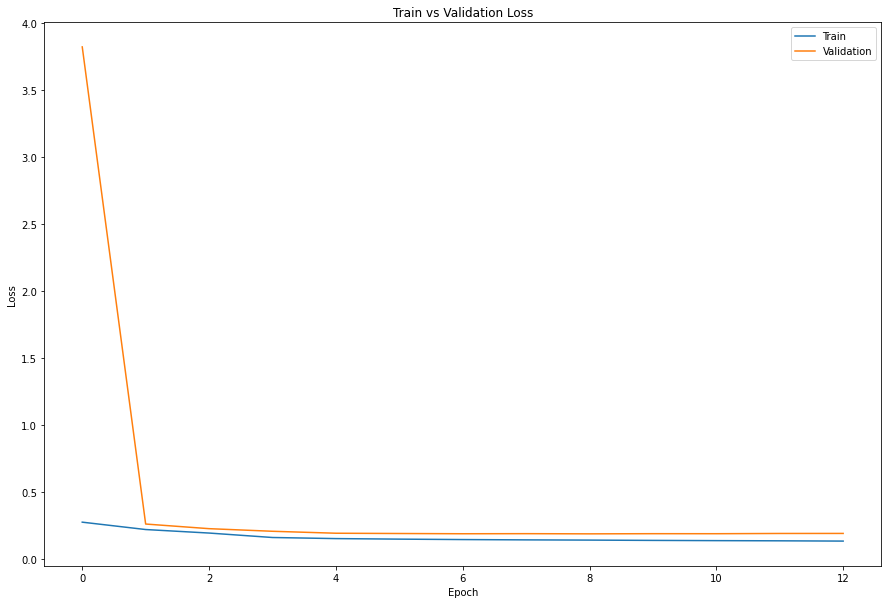

In [7]:
y1 = train_epoch_loss_list
y2 = val_epoch_loss_list
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

In [14]:
# Load model
i=4
model = get_model_instance_segmentation(2)
model.to(device)
model.load_state_dict(torch.load('./model/ex1_1_'+str(i)+'.pt'))
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [15]:
# AP Caculation
labels = []
preds_adj_all = []
annot_all = []
for im, annot in tqdm(test_data_loader, position = 0, leave = True):
    im = list(img.to(device) for img in im)
    for t in annot:
        labels += t['labels']
    with torch.no_grad():
        preds_adj = make_prediction(model, im, 0.5)
        preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
        preds_adj_all.append(preds_adj)
        annot_all.append(annot)
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
    sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
mAP = torch.mean(AP)
print(f'AP : {mAP}')

100%|█████████████████████████████████████████| 727/727 [00:54<00:00, 13.41it/s]


AP : 0.9036352738277582


In [16]:
y1

[0.27164918650907116,
 0.216572627436779,
 0.19030094165586672,
 0.1570621297605279,
 0.14890742065473803,
 0.14487705043881988,
 0.1416719438029941,
 0.13931854012143574,
 0.13762742294443986,
 0.1353874421590307,
 0.13366124874692728,
 0.132329713317946,
 0.13024149126770346]

In [17]:
y2

[3.8221411589440217,
 0.25769842543492194,
 0.2230680020954305,
 0.20356635596613473,
 0.1889547933424485,
 0.18693483630943414,
 0.1850819314037994,
 0.18571252724635634,
 0.18439660808510067,
 0.18553678587677572,
 0.1853730621337478,
 0.18722190682639542,
 0.18749878576432982]